In [6]:
import pandas as pd
liver_data = pd.read_csv("indian_liver_patient.csv")
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
y = liver_data['Dataset']
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

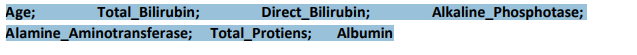

In [19]:
x = liver_data.drop(['Dataset','Gender','Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio'], axis=1)
x

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin
0,65,0.7,0.1,187,16,6.8,3.3
1,62,10.9,5.5,699,64,7.5,3.2
2,62,7.3,4.1,490,60,7.0,3.3
3,58,1.0,0.4,182,14,6.8,3.4
4,72,3.9,2.0,195,27,7.3,2.4
...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,5.9,1.6
579,40,0.6,0.1,98,35,6.0,3.2
580,52,0.8,0.2,245,48,6.4,3.2
581,31,1.3,0.5,184,29,6.8,3.4


In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=70, max_leaf_nodes=10, n_jobs=-1,
                                oob_score=True, random_state=42)
rf_clf.fit(xtrain, ytrain)

results = rf_clf.predict(xtest)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

cm = confusion_matrix(ytest, results)
print("Confusion matrix\n\n", cm)
print(metrics.classification_report(ytest, results))
print(accuracy_score(ytest, results))

Confusion matrix

 [[75  3]
 [34  5]]
              precision    recall  f1-score   support

           1       0.69      0.96      0.80        78
           2       0.62      0.13      0.21        39

    accuracy                           0.68       117
   macro avg       0.66      0.54      0.51       117
weighted avg       0.67      0.68      0.61       117

0.6837606837606838


In [34]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=70, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(xtrain, ytrain)


#Predict the response for test dataset
y_pred = model1.predict(xtest)

In [35]:
cm = confusion_matrix(ytest, y_pred)
print("Confusion matrix\n\n", cm)
print(metrics.classification_report(ytest, y_pred))
print(accuracy_score(ytest, y_pred))

Confusion matrix

 [[66 12]
 [28 11]]
              precision    recall  f1-score   support

           1       0.70      0.85      0.77        78
           2       0.48      0.28      0.35        39

    accuracy                           0.66       117
   macro avg       0.59      0.56      0.56       117
weighted avg       0.63      0.66      0.63       117

0.6581196581196581


The random forect classifier has btter accuracy as comaped to AdaBoost in this case